In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
import math

In [4]:
#ratings = pd.read_csv('/Users/denisehansen/Desktop/ITU/Thesis/Fair-Recommendations/ml-latest-small/ratings.csv', sep=',',
#                      names=['user', 'item', 'rating', 'timestamp'], header=0)

#items = pd.read_csv('/Users/denisehansen/Desktop/ITU/Thesis/Fair-Recommendations/ml-latest-small/movies.csv', sep=',',
#                      names=['item','title','genres'], header=0)


#ratings = pd.read_csv('/Users/josse/Git-kode projects/Speciale/Fair-Recommendations/ml-latest-small/ratings.csv', sep=',',
#                      names=['user', 'item', 'rating', 'timestamp'], header=0)


ratings = pd.read_csv('/Users/josse/Git-kode projects/Speciale/Fair-Recommendations/movielens100k/u.data', sep='\s+',
                   names=['user', 'item', 'rating', 'timestamp'], header=0)

items = pd.read_csv('/Users/josse/Git-kode projects/Speciale/Fair-Recommendations/movielens100k/movies.csv', sep=',',
                      names=['item','title','genres'], header=0)

items.head()

#C:\Users\josse\Git-kode projects\Speciale\Fair-Recommendations\ml-latest-small\ratings.csv

,item,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
items.shape

(9125, 3)

In [5]:
items["genres"] = items.genres.str.split('|')
#s = items.genres
#print(s.str.len())
#i = np.arange(len(s)).repeat(s.str.len())
#res = items.iloc[i].assign(**{"genres": np.concatenate(s)})

In [7]:
items.iloc[45:55,:]
#res.info()

,item,title,genres
45,47,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]"
46,48,Pocahontas (1995),"[Animation, Children, Drama, Musical, Romance]"
47,49,When Night Is Falling (1995),"[Drama, Romance]"
48,50,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"
49,52,Mighty Aphrodite (1995),"[Comedy, Drama, Romance]"
50,53,Lamerica (1994),"[Adventure, Drama]"
51,54,"Big Green, The (1995)","[Children, Comedy]"
52,55,Georgia (1995),[Drama]
53,57,Home for the Holidays (1995),[Drama]
54,58,"Postman, The (Postino, Il) (1994)","[Comedy, Drama, Romance]"


In [7]:
#print(res["item"].nunique())

In [14]:
rateditems = ratings.item.unique()
rateditems = pd.DataFrame(rateditems, columns =['item'])
rateditems = rateditems.join(items.set_index('item'), on='item', how = "left")
rateditems = rateditems.dropna().reset_index()
rateditems.head()
rateditems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 4 columns):
index     1337 non-null int64
item      1337 non-null int64
title     1337 non-null object
genres    1337 non-null object
dtypes: int64(2), object(2)
memory usage: 41.9+ KB


In [15]:
rateditems.shape

(1337, 4)

In [9]:
#"explode" the ratedItems dataset on genre. such that each entry contains only one genre.
#user1, movie 1 drama
#user 1 movie 1 action ect. 
#rateditems["genres"] = rateditems.genres.str.split('|')
s = rateditems.genres
s
i = np.arange(len(s)).repeat(s.str.len())
rateditemsExploded = rateditems.iloc[i].assign(**{"genres": np.concatenate(s)})

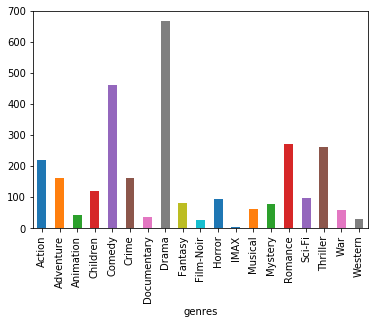

In [10]:
rateditemsExploded.groupby('genres').item.count().plot.bar()

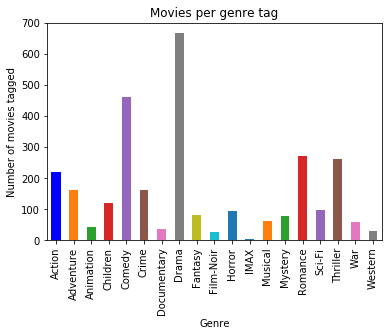

In [11]:
# Plot simple scatter of the number of movies tagged with each genre
plt.figure(figsize=(6,4))
barlist = rateditemsExploded.groupby('genres').item.count().plot.bar()
barlist.patches[0].set_color('b') # Color 'All_movies' differently, as it's not a genre tag count
plt.xticks(rotation='vertical')
plt.title('Movies per genre tag')
plt.xlabel('Genre')
plt.ylabel('Number of movies tagged')
plt.savefig('rateditems.png', bbox_inches = "tight")
#plt.savefig('myfile.png')
plt.show()

In [12]:
joined = ratings.join(items.set_index('item'), on='item')
joined= joined.drop('timestamp', axis=1)
joined= joined.drop('title', axis=1)
joined["rating"] = joined["rating"].astype(float)
#data_df['grade'] = data_df['grade'].astype(int)
print(joined.item.nunique())
joined = joined.dropna().reset_index()

1682


In [13]:
print(joined.item.nunique()) 
print(ratings.user.nunique()) 

1337
943


In [14]:
#"explode" the joined dataset on genre. such that each entry contains only one genre.
#user1, movie 1 drama
#user 1 movie 1 action ect. 

s = joined.genres
i = np.arange(len(s)).repeat(s.str.len())
print(i)
joined = joined.iloc[i].assign(**{"genres": np.concatenate(s)})

[    0     0     1 ... 84203 84203 84204]


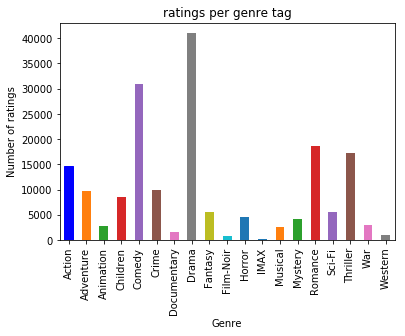

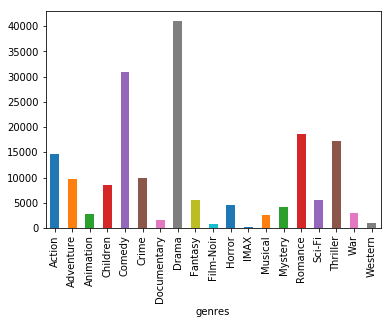

In [15]:
# Plot simple scatter of the number of ratings of movies accross each genre
plt.figure(figsize=(6,4))
barlist = joined.groupby('genres').item.count().plot.bar()
barlist.patches[0].set_color('b') # Color 'All_movies' differently, as it's not a genre tag count
plt.xticks(rotation='vertical')
plt.title('ratings per genre tag')
plt.xlabel('Genre')
plt.ylabel('Number of ratings')
plt.savefig('ratings.png', bbox_inches = "tight")
#plt.savefig('myfile.png')
plt.show()

joined.groupby('genres').item.count().plot.bar()

In [16]:
#average ratings pr movie in each genre 
x = rateditemsExploded.groupby('genres').item.count()
y = joined.groupby('genres').item.count()
z = y/x
z

genres
Action         66.666667
Adventure      60.212500
Animation      68.380952
Children       71.800000
Comedy         67.373913
Crime          61.906250
Documentary    48.088235
Drama          61.548726
Fantasy        66.914634
Film-Noir      32.307692
Horror         48.967391
IMAX           66.500000
Musical        42.524590
Mystery        53.692308
Romance        68.669118
Sci-Fi         58.760417
Thriller       66.072519
War            49.913793
Western        38.071429
Name: item, dtype: float64

In [17]:
#hvor mange gange er en drama film er blevet rated
res2 = joined[joined["genres"] == "Drama"]
res2["item"].count()

41053

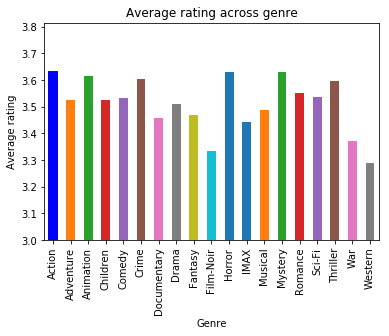

In [19]:
# Plot simple scatter of the number of ratings of movies accross each genre
#print( res4.mean())
plt.figure(figsize=(6,4))
barlist = joined.groupby('genres').rating.mean().plot.bar()
barlist.patches[0].set_color('b') # Color 'All_movies' differently, as it's not a genre tag count
#plt.axhline(y=mean)
plt.ylim(bottom=3) 
#plt.mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')
plt.xticks(rotation='vertical')
plt.title('Average rating across genre')
plt.xlabel('Genre')
plt.ylabel('Average rating')
plt.savefig('average_rating.png', bbox_inches = "tight")
#plt.savefig('myfile.png')
plt.show()

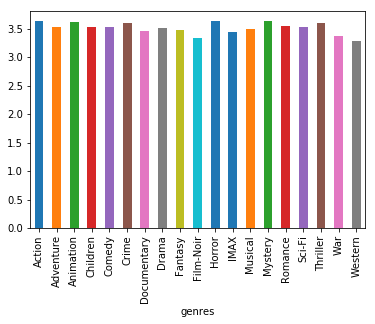

In [20]:
joined.groupby('genres').rating.mean().plot.bar()

In [21]:
res4= joined.groupby('genres').rating.mean()
res4

genres
Action         3.634110
Adventure      3.525016
Animation      3.614554
Children       3.524373
Comedy         3.531815
Crime          3.603635
Documentary    3.456881
Drama          3.509877
Fantasy        3.470020
Film-Noir      3.335714
Horror         3.630633
IMAX           3.443609
Musical        3.488435
Mystery        3.631805
Romance        3.550166
Sci-Fi         3.535543
Thriller       3.594940
War            3.373402
Western        3.290807
Name: rating, dtype: float64

In [ ]:
def app_total_count_ratings(s):
    res2 = res1[res1["genres"] == s]
    return res2["item"].count()

def app_distinct_count_ratings(s):
    res2 = res1[res1["genres"] == s ]
    return res2["item"].nunique()



In [22]:
def app_movies_procent(s):
    return s/1300

In [32]:
#'total_count_ratings', 'distinct_count_ratings', 'coverage']
#total_count_movies  = number of distinct movies in each genre
#total_count_ratings = number of times a movie with the given genres has been rated
#distinct_count_rating =number of diferent items in each gerne that have been rated. 
#coverage = the precentage of movies in each genre that have been rated at least once (total_count_movies/distinct_count_rating)

index = range(19)
index
ressult =rateditemsExploded.groupby('genres').item.count()
genre_stats = pd.DataFrame(ressult)

#genre_stats['total_count_ratings'] = genre_stats['genres'].apply(app_total_count_ratings)
#genre_stats['distinct_count_rating'] = genre_stats['genres'].apply(app_distinct_count_ratings)
#genre_stats['coverage'] = genre_stats['distinct_count_rating']/genre_stats['total_count_movies']*100
genre_stats.reset_index()

#total_count_movies  = number of distinct movies in each genre
#total_count_ratings = number of times a movie with the given genres has been rated
#distinct_count_rating =number of diferent items in each gerne that have been rated. 
#coverage = the precentage of movies in each genre that have been rated at least once (total_count_movies/distinct_count_rating)

index = range(19)
index
ressult =rateditemsExploded.groupby('genres').item.count()
genre_stats = pd.DataFrame(ressult)

#genre_stats['total_count_ratings'] = genre_stats['genres'].apply(app_total_count_ratings)
#genre_stats['distinct_count_rating'] = genre_stats['genres'].apply(app_distinct_count_ratings)
#genre_stats['coverage'] = genre_stats['distinct_count_rating']/genre_stats['total_count_movies']*100
genre_stats.reset_index()

genre_stats['item_in_procents'] = genre_stats["item"] / 1337 *100

genre_stats



,item,item_in_procents
genres,,
Action,219,16.379955
Adventure,160,11.967091
Animation,42,3.141361
Children,120,8.975318
Comedy,460,34.405385
Crime,160,11.967091
Documentary,34,2.543007
Drama,667,49.887809
Fantasy,82,6.133134


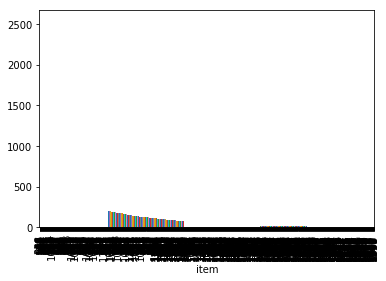

In [47]:
freq = joined.groupby('item').rating.count()
freq.collumns = "item","hej"
freq.sort_values(ascending=False).plot.bar()

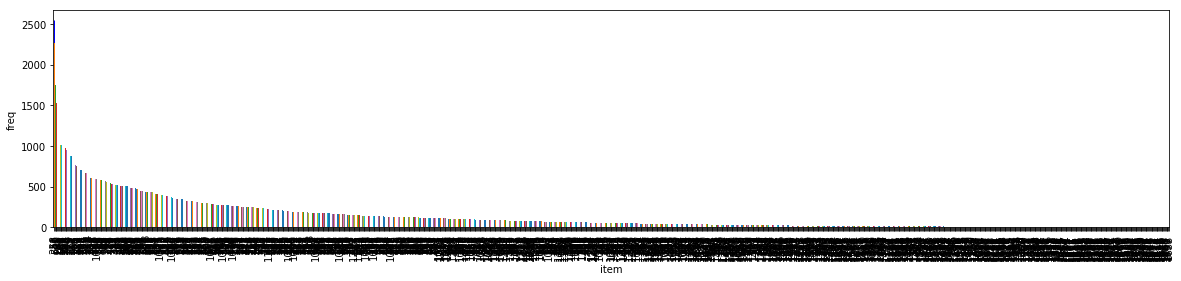

In [48]:
plt.figure(figsize=(20,4))
barlist = freq.sort_values(ascending=False).plot.bar()
barlist.patches[0].set_color('b') # Color 'All_movies' differently, as it's not a genre tag count
#plt.axhline(y=mean)
#plt.ylim(bottom=3) 
#plt.mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')
plt.xticks(rotation='vertical')
#plt.title('Average rating across genre')
plt.xlabel('item')
plt.ylabel('freq')
plt.savefig('average_rating.png', bbox_inches = "tight")
#plt.savefig('myfile.png')
plt.show()